In [2]:
#MNIST是一个入门级的计算机视觉数据集，它包含各种手写数字图片
#它也包含每一张图片对应的标签，告诉我们这个是数字几。
#在此，我们将训练一个机器学习模型用于预测图片里面的数字。
#我们的目的不是要设计一个世界一流的复杂模型 -- 尽管我们会在之后给你源代码去实现一流的预测模型 -- 而是要介绍下如何使用TensorFlow。
#所以，我们这里会从一个很简单的数学模型开始，它叫做Softmax Regression。
#对应这个教程的实现代码很短，而且真正有意思的内容只包含在三行代码里面。
#但是，去理解包含在这些代码里面的设计思想是非常重要的：TensorFlow工作流程和机器学习的基本概念。
#因此，这个教程会很详细地介绍这些代码的实现原理。
#http://wiki.jikexueyuan.com/project/tensorflow-zh/tutorials/mnist_beginners.html
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.examples.tutorials.mnist import input_data
import input_data

print ("packs loaded")

packs loaded


In [3]:
print ("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print
print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (mnist.train.num_examples))
print (" number of test data is %d" % (mnist.test.num_examples))

Download and Extract MNIST dataset
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
 tpye of 'mnist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
 number of trian data is 55000
 number of test data is 10000


In [4]:
#what does the data of MINIST look like?
print ("what does the data of MINIST look like?")
trainimg=mnist.train.images
trainlabel=mnist.train.labels
testimg=mnist.test.images
testlabel=mnist.test.labels
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))#28*28,总共784个像素
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))#0-9十个标签
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

what does the data of MINIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (55000, 784)
 shape of 'trainlabel' is (55000, 10)
 shape of 'testimg' is (10000, 784)
 shape of 'testlabel' is (10000, 10)


How does the training data look like?
13985th Training Data Label is 9


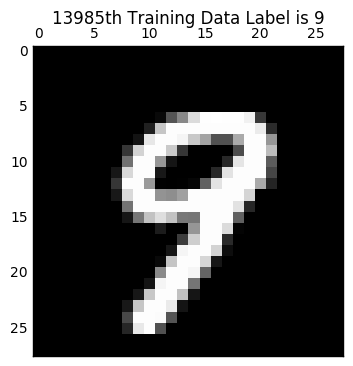

38568th Training Data Label is 5


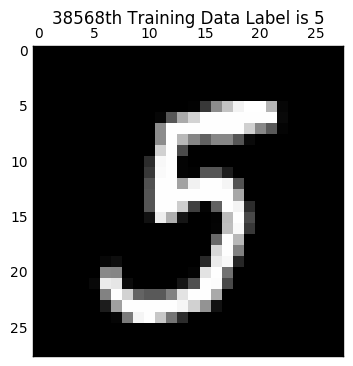

33618th Training Data Label is 2


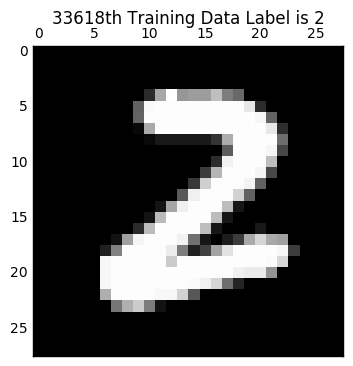

4418th Training Data Label is 3


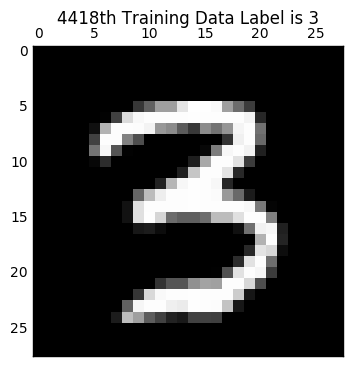

52264th Training Data Label is 3


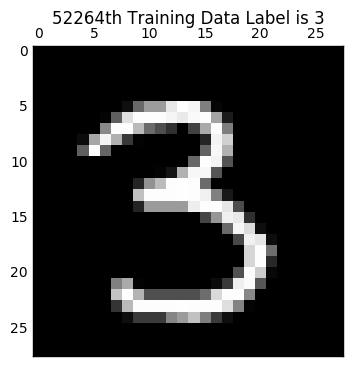

In [5]:
# How does the training data look like?
print ("How does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    #tf.reshape(tensor, shape, name=None) 
    #函数的作用是将tensor变换为参数shape的形式。 
    #其中shape为一个列表形式，特殊的一点是列表中可以存在-1。
    #-1代表的含义是不用我们自己指定这一维的大小，函数会自动计算，但列表中只能存在一个-1。
    #（当然如果存在多个-1，就是一个存在多解的方程了）
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    #对矩阵按行或列计算最大值
    #tf.argmax(input, axis=None, name=None, dimension=None)
    #input：输入Tensor
    #axis：0表示按列，1表示按行
    #name：名称
    #dimension：和axis功能一样，默认axis取值优先。新加的字段
    #返回：Tensor  一般是行或列的最大值下标向量
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    #矩阵图
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    #print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))
    plt.show()

In [6]:
# Batch Learning? 
print ("Batch Learning? ")
batch_size = 100
#加载下一个训练数据
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print ("type of 'batch_xs' is %s" % (type(batch_xs)))
print ("type of 'batch_ys' is %s" % (type(batch_ys)))
print ("shape of 'batch_xs' is %s" % (batch_xs.shape,))
print ("shape of 'batch_ys' is %s" % (batch_ys.shape,))

Batch Learning? 
type of 'batch_xs' is <class 'numpy.ndarray'>
type of 'batch_ys' is <class 'numpy.ndarray'>
shape of 'batch_xs' is (100, 784)
shape of 'batch_ys' is (100, 10)
